Results saved to unseen_test_set_predictions.csv


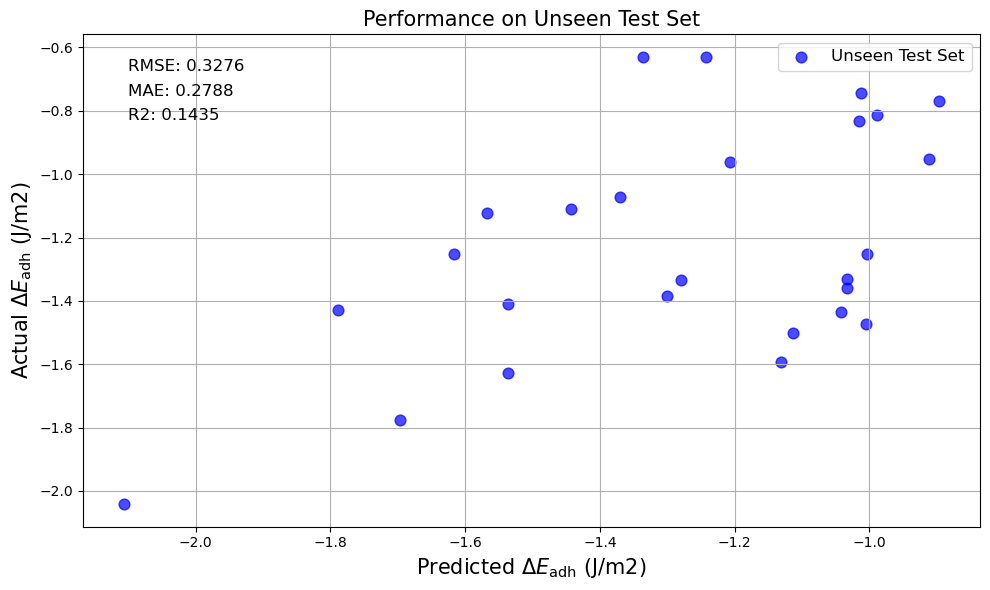

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import load

def preprocess_data(filepath):
    """
    Load and preprocess the unseen test dataset.
    """
    if os.path.exists(filepath):
        data = pd.read_csv(filepath)
        #feature_names = ["E_surf.", "WF", "Ra", "NC_postive", "NC_negative", "Dipole_Z", "rho_O", "rho_M", "M_SBO", "O_SBO"]
        feature_names = ["E_surf.", "WF", "Ra", "NC_postive", "NC_negative", "Dipole_Z", "rho_O", "rho_M", "M_SBO", "O_SBO", "Ef", "Ehull"]
        X_test = data[feature_names]
        y_test_with_remarks = data[['E_adh', 'File_pathway', 'Bulk', 'Surfaces']]
        y_test = y_test_with_remarks['E_adh']
    else:
        raise FileNotFoundError("Unseen test dataset not found!")
    
    return X_test, y_test, y_test_with_remarks

def load_model(model_path):
    """
    Load the trained model from a file using joblib.
    """
    model = load(model_path)
    return model

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model on the unseen test dataset.
    """
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_pred, rmse, mae, r2

def visualize_results(y_test, y_pred, rmse, mae, r2):
    """
    Visualize the predicted vs actual values for the unseen test dataset.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, y_test, alpha=0.7, color='b', label='Unseen Test Set', s=60)
    plt.xlabel('Predicted $\mathit{\Delta E}_\mathrm{adh}$ (J/m2)', fontsize=15)
    plt.ylabel('Actual $\mathit{\Delta E}_\mathrm{adh}$ (J/m2)', fontsize=15)
    plt.title('Performance on Unseen Test Set', fontsize=15)
    plt.legend(fontsize=12)
    plt.grid(True)
    
    # Add RMSE, MAE, and R2 scores to the plot
    plt.text(0.05, 0.95, f'RMSE: {rmse:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.text(0.05, 0.90, f'MAE: {mae:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.text(0.05, 0.85, f'R2: {r2:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    plt.tight_layout()
    # Save the plots
    plt.savefig('Unseen_cases_prediction_600dpi.png', dpi=600)
    plt.savefig('Unseen_cases_prediction_graph.svg', format='svg')
    plt.savefig('Unseen_cases_prediction_graph.pdf', format='pdf')
    plt.show()

def save_results_to_csv(y_test_with_remarks, y_pred, output_path):
    """
    Save the predicted outputs, original data, and data labels to a CSV file.
    """
    output_data = y_test_with_remarks.copy()
    output_data['Predicted_E_adh'] = y_pred
    output_data.to_csv(output_path, index=False)
    print(f"Results saved to {output_path}")

def main():
    unseen_data_path = "Unseen_test_set_combined.csv"
    model_path = "ebm_model.joblib"  # 使用 joblib 保存的模型文件
    output_path = "unseen_test_set_predictions.csv"
    
    # Preprocess the unseen test dataset
    X_test, y_test, y_test_with_remarks = preprocess_data(unseen_data_path)
    
    # Load the trained model using joblib
    model = load_model(model_path)
    
    # Evaluate the model on the unseen test dataset
    y_pred, rmse, mae, r2 = evaluate_model(model, X_test, y_test)
    
    # Save the predicted outputs, original data, and data labels to a CSV file
    save_results_to_csv(y_test_with_remarks, y_pred, output_path)
    
    # Visualize the results
    visualize_results(y_test, y_pred, rmse, mae, r2)

if __name__ == "__main__":
    main()